## Question 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plotUnitCircle(p):
    for i in range(10000):
        x = np.array([np.random.rand()*2-1,np.random.rand()*2-1])
        if np.linalg.norm(x,p) < 1:
            plt.plot(x[0],x[1],'bo')
    plt.axis([-1.5, 1.5, -1.5, 1.5])
    plt.show()

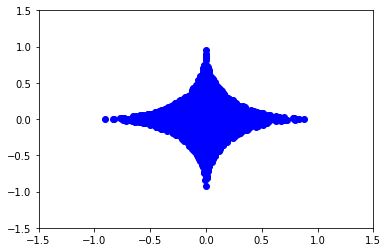

In [2]:
plotUnitCircle(0.5) #when p=0.5 i.e <1 , the norm ball is concave in shape

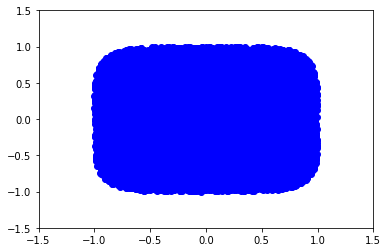

In [3]:
plotUnitCircle(5)  #when p=5 i.e >1 , the norm ball is convex in shape

## Question2 

In [4]:
def func_output(n,x):
    if x>=0 and x<1/2:
        y=1
    elif x>=1/2 and x<= 0.5 + 1/n:
        y=1 - n*(x-0.5)
    elif x<=1:
        y=0
        
    return y

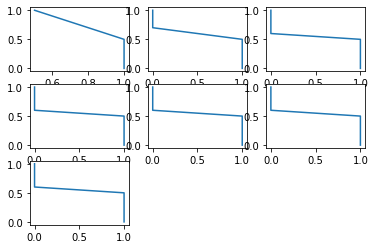

In [5]:
N=[1,5,10,50,80,120,100000]
X=np.arange(0,1.1,0.1)
i=1
y=[]
for n in N:
    for x in X:
        y.append(func_output(n,x))
    plt.subplot(3,3,i)
    plt.plot(y,X)
    i=i+1
    y=[]      

The sequence of functions chosen to demonstrate this are cauchy but they don't converge to a single point in X. This is also demonstrate by the above plots with the range of values of n going from 1 to 100000(infinity). We can infer that the space C[0,1] is incomplete with respect to L1 norm

## Question 3

In [6]:
#entropy function
from math import log2
def entropy(P):
    P = [i for i in P if i != 0]
    entropy = -sum([P[i] * log2(P[i]) for i in range(0,len(P))]) 
    print('entropy: %.3f bits' % entropy)
    return entropy

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
entropy: 0.469 bits
entropy: 0.722 bits
entropy: 0.881 bits
entropy: 0.971 bits
entropy: 1.000 bits
entropy: 0.971 bits
entropy: 0.881 bits
entropy: 0.722 bits
entropy: 0.469 bits


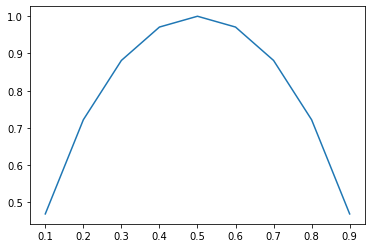

In [7]:
#plotting the entropy of of X ∼ Bern(p)
X=[0,1]
P=[]
p=np.arange(0.1,1,0.1)
print(p)
ent=[]
for i in p:
    for x in X:
        P.append((i**x)*((1-i)**(1-x)))
    ent.append(entropy(P))
    P=[]

plt.plot(p,ent)

The above plot attains maximum at x=0.5

## Question 4


In [8]:
# function that returns the normalzed histogram of a gray scale image 
from PIL import Image
def img_hist(img_path):
    image = np.array(Image.open(img_path))
    m=len(image)
    n=len(image[0])
    count =[]
    r = []
    for k in range(0, 256):
        r.append(k)
        count1 = 0
        for i in range(m):
            for j in range(n):
                if image[i, j]== k:
                    count1+= 1
        count.append(count1/(m*n))          
    return (r, count)

Text(0.5, 1.0, 'Histogram of the original image')

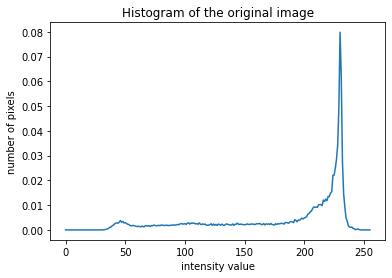

In [9]:
r1, count1 = img_hist('5.1.12.tiff')
plt.plot(r1, count1)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the original image')

In [10]:
#finding the image entropies (comparision)
a1,b1 =img_hist('5.1.12.tiff')
entropy(b1)
a2,b2 =img_hist('5.1.10.tiff')
entropy(b2)
a3,b3 =img_hist('5.1.09.tiff')
entropy(b3)

entropy: 6.706 bits
entropy: 7.312 bits
entropy: 6.709 bits


6.709312335966639

Different images have different entropies. We can infer that the pixel intensities of different pixels in the images vary . The probability of specific pixel intensity being present is what changes the entropy for different images.

## Question 5 

5(a)

In [11]:
# function to plot joint histogram of a streo image pair
def joint_hist(img1,img2):
    res = np.zeros((256, 256))
    image1 = np.array(Image.open(img1))
    m=len(image1)
    n=len(image1[0])
    image2 = np.array(Image.open(img2))
    for i in range(m):
        for j in range(n):
            res[image1[i,j]][image2[i,j]]+=1
    
    return res,m,n

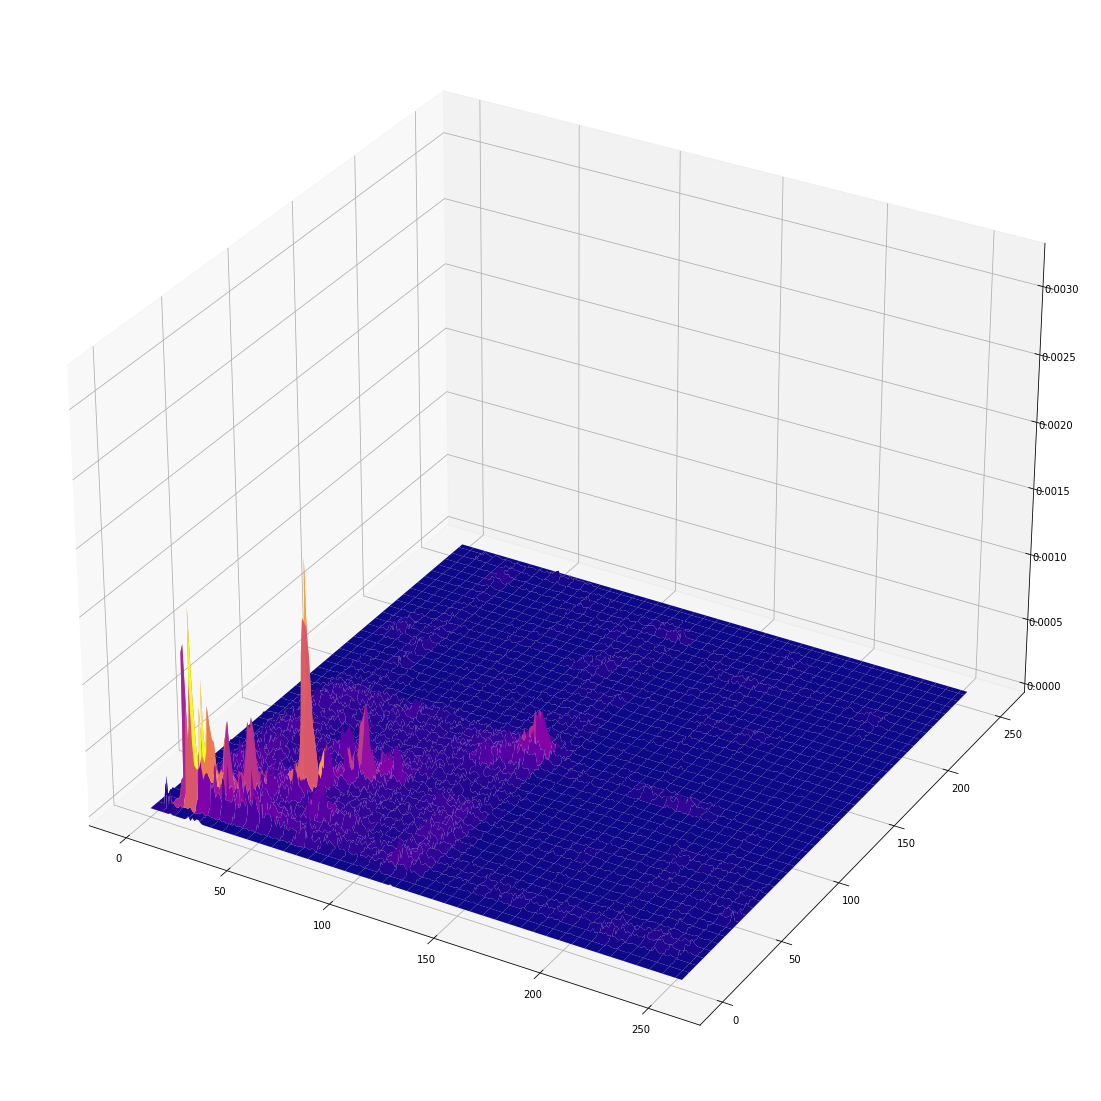

In [12]:
#3D plot of the joint histogram
pixel_count,m,n = joint_hist('left.png','right.png')
pixel_count=pixel_count/(m*n)

from matplotlib import cm
x = range(256)
y = range(256)

hf = plt.figure(figsize=(20,20))

ha = hf.add_subplot(111,projection = '3d')
X, Y = np.meshgrid(x,y)
ha.plot_surface(X,Y,pixel_count,cmap='plasma')
plt.show()

5(b)

In [13]:
#function to calculate join entropy 
def joint_entropy(P):
    ent=0
    for i in range(len(P)):        
        ent+= (-sum([P[i][j] * log2(P[i][j]) if P[i][j] > 0 else 0 for j in range(0,len(P[i])) ])) 
    print('entropy: %.3f bits' % ent)
    return ent

5(c)

In [14]:
joint_entropy(pixel_count)

entropy: 13.675 bits


13.675203263382317

## Question 6 

6(a)

In [15]:
#function to calculate the conditional PMF from joint PMF for the corresponding index
#ind 0 is x and 1 is y 
def cond_from_joint_pmf(P,ind,val):
    if(ind == 0):
        px=sum([P[val][i] for i in range(len(P[0]))])
        rows, cols = (1, len(P[0]))
        res = [[0 for i in range(cols)] for j in range(rows)]
        for i in range(cols):
            res[0][i]=P[val][i]/px
            
    elif (ind ==1):
        py=sum([P[i][val] for i in range(len(P))])
        rows, cols = (len(P),1)
        res = [[0 for i in range(cols)] for j in range(rows)]
        for i in range(len(P)):
            res[i][0]=P[i][val]/py
            
    return res

6(b)

In [16]:
#function to find conditional entropy
def cond_entropy(JP,ind):
    ent=0
    if(ind ==0):
        for i in range(len(JP)):            
            res=cond_from_joint_pmf(JP,ind,i)
            ent+= (-sum([JP[i][j] * log2(res[0][j]) if res[0][j] > 0 else 0 for j in range(0,len(JP[i]))]))
    elif(ind ==1):
        for j in range(len(JP[0])):
            res=cond_from_joint_pmf(JP,ind,j)
            ent+= (-sum([JP[i][j] * log2(res[i][0]) if res[i][0] > 0 else 0 for i in range(0,len(JP))]))
            
    return ent

6(c)

In [17]:
cond_entropy(pixel_count,1)  #conditioning variable is y (pixel intensities of second image)

/tmp/ipykernel_310060/4265534207.py:16: RuntimeWarning: invalid value encountered in double_scalars
  res[i][0]=P[i][val]/py


6.39657773168618

In [18]:
cond_entropy(pixel_count,0) #conditioning variable is x (pixel intensities of first image)

/tmp/ipykernel_310060/4265534207.py:9: RuntimeWarning: invalid value encountered in double_scalars
  res[0][i]=P[val][i]/px


6.416909158632363

## Question 7

7(a)

In [19]:
#function to calculate KL divergence between two PMFs
def kl_divergence(p,q):    
    for i in range(len(p)):
        D =  sum([p[i] * log2(p[i]/q[i]) if p[i]>0 else 0 for i in range(0,len(p))]) 
    return D

7(b)

In [20]:
# let p ∼ Bern(r) and q ∼ Bern(s) 
# r is fixed r=0.5 
X=[0,1]
r=0.5
s=np.arange(0.1,1,0.1)
p=[]
for x in X:
    p.append((r**x)*((1-r)**(1-x)))
q =[]
kl_output1=[]
kl_output2=[]
for i in s:
    for x in X:
        q.append((i**x)*((1-i)**(1-x)))
    kl_output1.append(kl_divergence(p,q))
    kl_output2.append(kl_divergence(q,p))
    q=[]

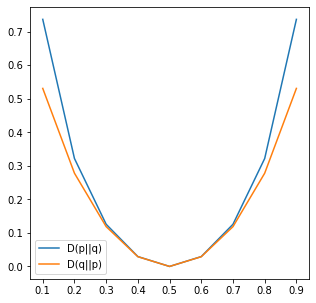

In [21]:
plt.figure(figsize=(5,5))
plt.plot(s,kl_output1)
plt.plot(s,kl_output2)
plt.legend(['D(p||q)','D(q||p)'])
plt.show()

ii) We can infer from the plots as well that the value of kl_divergence be it D(p||q)or D(q||p) is always non- negative

iii) Again from the plots we can infer that the two curves have no values similar except at 0.5 becuase at 0.5 the value of p and q is same. Further the value of kl divergence is zero at p=q i.e at 0.5.

In [22]:
#D(p||q) and D(q||p) where p and q are normalized histograms of the below mentioned images 

a1,p=img_hist('left.png')
a2,q=img_hist('right.png')

print(f"The kl_divergence D(p||q) is {kl_divergence(p,q)}")
print(f"The kl_divergence D(q||p) is {kl_divergence(q,p)}")

The kl_divergence D(p||q) is 0.015104015237387055
The kl_divergence D(q||p) is 0.014409785833354494


kl_divergence is not a really good metric to measure the similarity between two images specially when they are coloured because it considers only the grey value information and not the spatial distribution of the pixel color values. This might be a good metric in identifying similarity between gray scale images because the kl divergence is 0 if p and q are distributed the same otherwise and the value won't change on rotations as well